In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

"\neffvals = [ EFF(r, a,gamma) for r in rvals ]\nplt.plot(rvals, effvals, label=r'$a = %.01f \\, {\rm pc}, \\gamma = %.01f$'%(a, gamma))\nhistogram, bin_edges = np.histogram(rvals_sampled, bins=20)\n\nbin_centers = [0.5*(bin_edges[i]+bin_edges[i+1]) for i in range(len(bin_edges)-1) ]\n\nmaxhh = max(histogram)\nplt.plot(bin_centers, [ h/maxhh for h in histogram ], label='sampled')\nplt.legend(loc='best')\n"

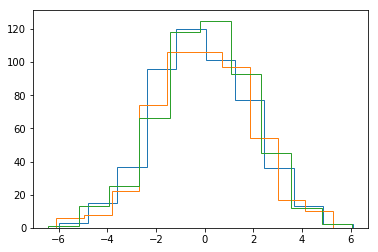

<Figure size 432x288 with 0 Axes>

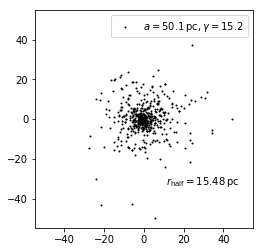

In [90]:
rvals = np.linspace(0, 100.2, 100)

def EFF(r, a, gamma):
    
    return (1 + (r/a)**2.)**(-gamma/2.)

def get_rvals(rmax, a, gamma, N):
    
    rvals = []
    
    while len(rvals) < N:
    
        flag = 0

        while flag == 0:

            rval_proposed = rmax*np.random.rand()
            yval_a, yval_b = EFF(rval_proposed, a, gamma), np.random.rand()

            if yval_b < yval_a:
                
                rvals.append(rval_proposed)
                flag = 1
                
    return rvals
                
a, gamma = 50.1, 15.2
sigma_U, sigma_V, sigma_W = 1.89, 0.9, 0.51

N = 500

uvals = np.random.normal(loc=0., scale=sigma_U, size=(N,))
vvals = np.random.normal(loc=0., scale=sigma_U, size=(N,))
wvals = np.random.normal(loc=0., scale=sigma_U, size=(N,))

plt.figure()
plt.hist(uvals, histtype='step')
plt.hist(vvals, histtype='step')
plt.hist(wvals, histtype='step')
        
plt.figure()

rvals_sampled = get_rvals(1.5*a, a, gamma, N)
phivals_sampled = [ 2*np.pi*np.random.random() for i in range(N)]
thetavals_sampled = [ np.arccos((2.*np.random.random()-1)) for i in range(N)]

xvals = [ rvals_sampled[i] * np.cos(phivals_sampled[i]) * np.sin(thetavals_sampled[i]) for i in range(N) ]
yvals = [ rvals_sampled[i] * np.sin(phivals_sampled[i]) * np.sin(thetavals_sampled[i]) for i in range(N) ]
zvals = [ rvals_sampled[i] * np.cos(thetavals_sampled[i]) for i in range(N) ]

plt.figure()
plt.scatter(xvals, yvals, c='k', s=1, label=r'$a = %.01f \, {\rm pc}, \gamma = %.01f$'%(a, gamma))
plt.xlim(-1.*np.amax(rvals_sampled), np.amax(rvals_sampled))
plt.ylim(-1.*np.amax(rvals_sampled), np.amax(rvals_sampled))
plt.annotate(r'$r_{\rm half} = %.02f \, {\rm pc}$'%(a*np.sqrt(4**(1/gamma)-1)), xy=(0.6, 0.2), xycoords='axes fraction')
plt.gca().set_aspect('equal')

plt.legend(loc='upper right')

'''
effvals = [ EFF(r, a,gamma) for r in rvals ]
plt.plot(rvals, effvals, label=r'$a = %.01f \, {\rm pc}, \gamma = %.01f$'%(a, gamma))
histogram, bin_edges = np.histogram(rvals_sampled, bins=20)

bin_centers = [0.5*(bin_edges[i]+bin_edges[i+1]) for i in range(len(bin_edges)-1) ]

maxhh = max(histogram)
plt.plot(bin_centers, [ h/maxhh for h in histogram ], label='sampled')
plt.legend(loc='best')
'''